<a href="https://colab.research.google.com/github/Esther-Zhou99/Data-Science/blob/main/HW5_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
pip install spacy

In [41]:
from pathlib import Path
import spacy

In [42]:
import spacy.cli
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [43]:
nlp = spacy.load("en_core_web_lg")

In [48]:
!rm *.txt
!wget https://raw.githubusercontent.com/Esther-Zhou99/Data-Science/main/oldmansea-book.txt
!wget https://raw.githubusercontent.com/Esther-Zhou99/Data-Science/main/SunAlsoRises-book.txt
!wget https://raw.githubusercontent.com/Esther-Zhou99/Data-Science/main/WinnerTakeNothing.txt
!wget https://raw.githubusercontent.com/Esther-Zhou99/Data-Science/main/MenWithoutWomen.txt
!wget https://raw.githubusercontent.com/Esther-Zhou99/Data-Science/main/GreenHillsofAfrica.txt
!wget https://raw.githubusercontent.com/Esther-Zhou99/Data-Science/main/AcrosstheRiver.txt

--2021-03-17 11:13:34--  https://raw.githubusercontent.com/Esther-Zhou99/Data-Science/main/oldmansea-book.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 134520 (131K) [text/plain]
Saving to: ‘oldmansea-book.txt’

oldmansea-book.txt  100%[===================>] 131.37K  --.-KB/s    in 0.008s  

2021-03-17 11:13:34 (15.6 MB/s) - ‘oldmansea-book.txt’ saved [134520/134520]

--2021-03-17 11:13:34--  https://raw.githubusercontent.com/Esther-Zhou99/Data-Science/main/SunAlsoRises-book.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length

In [49]:
novel1= nlp(Path('oldmansea-book.txt').read_text())
novel2= nlp(Path('SunAlsoRises-book.txt').read_text())
novel3= nlp(Path('WinnerTakeNothing.txt').read_text())
novel4= nlp(Path('MenWithoutWomen.txt').read_text())
novel5= nlp(Path('GreenHillsofAfrica.txt').read_text())
novel6= nlp(Path('AcrosstheRiver.txt').read_text())

In [50]:
novel1.similarity(novel2)

0.9886777726540446

In [61]:
lst=[novel1,novel2,novel3,novel4,novel5,novel6]
label=['The Old Man and the Sea','The Sun Also Rises','Winner Take Nothing','Men Without Women','Green Hills of Africa','Across the River and Into the Trees']
dataset=[]
for i, text1 in enumerate(label):
    for j,text2 in enumerate(label):
        dataset.append([text1,text2,lst[i].similarity(lst[j])])
dataset

[['The Old Man and the Sea', 'The Old Man and the Sea', 1.0],
 ['The Old Man and the Sea', 'The Sun Also Rises', 0.9886777726540446],
 ['The Old Man and the Sea', 'Winner Take Nothing', 0.9895178923350563],
 ['The Old Man and the Sea', 'Men Without Women', 0.9907030946383327],
 ['The Old Man and the Sea', 'Green Hills of Africa', 0.9933934877170096],
 ['The Old Man and the Sea',
  'Across the River and Into the Trees',
  0.986044118882676],
 ['The Sun Also Rises', 'The Old Man and the Sea', 0.9886777726540446],
 ['The Sun Also Rises', 'The Sun Also Rises', 1.0],
 ['The Sun Also Rises', 'Winner Take Nothing', 0.9984967879165995],
 ['The Sun Also Rises', 'Men Without Women', 0.9988191693029105],
 ['The Sun Also Rises', 'Green Hills of Africa', 0.991848448823398],
 ['The Sun Also Rises',
  'Across the River and Into the Trees',
  0.9911100484725602],
 ['Winner Take Nothing', 'The Old Man and the Sea', 0.9895178923350563],
 ['Winner Take Nothing', 'The Sun Also Rises', 0.9984967879165995],

In [65]:
import pandas as pd
column=['book1','book2','value']
test=pd.DataFrame(columns=column,data=dataset)
test.to_csv('test.csv') #如果生成excel，可以用to_excel

In [80]:
data = pd.read_csv("test.csv")
data

,Unnamed: 0,book1,book2,value
0,0,The Old Man and the Sea,The Old Man and the Sea,1.000000
1,1,The Old Man and the Sea,The Sun Also Rises,0.988678
2,2,The Old Man and the Sea,Winner Take Nothing,0.989518
3,3,The Old Man and the Sea,Men Without Women,0.990703
4,4,The Old Man and the Sea,Green Hills of Africa,0.993393
5,5,The Old Man and the Sea,Across the River and Into the Trees,0.986044
6,6,The Sun Also Rises,The Old Man and the Sea,0.988678
7,7,The Sun Also Rises,The Sun Also Rises,1.000000
8,8,The Sun Also Rises,Winner Take Nothing,0.998497
9,9,The Sun Also Rises,Men Without Women,0.998819


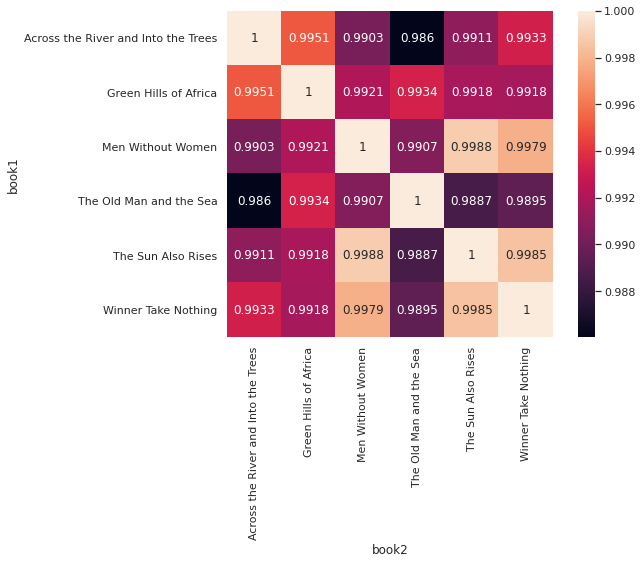

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

flights = data.pivot("book1", "book2", "value")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
fig=sns.heatmap(flights, annot=True, fmt='.4g', ax=ax, square=True)
fig = plt.gcf()
plt.show()
fig.savefig('test.png', dpi=600, bbox_inches = 'tight')